<a href="https://colab.research.google.com/github/CatarinaL/ddosLogs/blob/master/exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns

#DDOS Log data

Data from: https://www.kaggle.com/jacobvs/ddos-attack-network-logs

> The data was collected from a larger-scale network and thus depending on your usage you can ignore a lot of the first attributes of the dataset as they're more network specific.

## Context
The dataset contains around 2,100,000 labelled network logs from various types of network attacks.
The types of network attacks logged are: UDP-Flood, Smurf, SIDDOS, HTTP-FLOOD, & Normal traffic

## Content
Each line of data contains these attributes:

* @attribute SRC_ADD numeric
* @attribute DES_ADD numeric
* @attribute PKT_ID numeric
* @attribute FROM_NODE numeric
* @attribute TO_NODE numeric
* @attribute PKT_TYPE {tcp,ack,cbr,ping}
* @attribute PKT_SIZE numeric
* @attribute FLAGS {-------,---A---}
* @attribute FID numeric
* @attribute SEQ_NUMBER numeric
* @attribute NUMBEROFPKT numeric
* @attribute NUMBEROFBYTE numeric
* @attribute NODENAMEFROM {Switch1,Router,server1,router,clien-4,client-2,Switch2,client-5,clien-9,clien-2,clien-1,clien-14,clien-5,clien-11,clien-13,clien-0,switch1,client-4,clienthttp,clien-7,clien-19,client-14,clien-12,clien-8,clien-15,webserverlistin,client-18,client-1,switch2,clien-6,client-10,client-7,webcache,clien-10,client-15,clien-3,client-17,client-16,clien-17,clien-18,client-12,client-8,client-0,clien-16,client-13,client-11,client-6,client-3,client-9,client-19,http_client}
* @attribute NODENAMETO {Router,server1,Switch2,Switch1,clien-1,clien-5,clien-7,switch1,clien-11,clien-15,clien-13,clien-3,clien-9,clien-6,router,clien-4,clien-14,switch2,clien-8,clienthttp,webcache,clien-10,clien-12,webserverlistin,clien-0,clien-2,http_client,client-13,client-9,client-1,client-19,client-4,client-17,client-7,client-3,client-12,client-2,clien-18,client-16,clien-17,client-0,clien-16,client-18,client-5,client-11,client-14,client-8,client-6,client-10,clien-19,client-15}
* @attribute PKT_IN numeric
* @attribute PKT_OUT numeric
* @attribute PKT_R numeric
* @attribute PKTDELAYNODE numeric
* @attribute PKT_RATE numeric
* @attribute BYTE_RATE numeric
* @attribute PKTAVGSIZE numeric
* @attribute UTILIZATION numeric
* @attribute PKT_DELAY numeric
* @attribute PKTSENDTIME numeric
* @attribute PKTRESEVEDTIME numeric
* @attribute FIRSTPKTSENT numeric
* @attribute LASTPKTRESEVED numeric
* @attribute PKT_CLASS {Normal,UDP-Flood,Smurf,SIDDOS,HTTP-FLOOD}

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#data from mounted google drive available at: https://www.kaggle.com/jacobvs/ddos-attack-network-logs

file = "/content/drive/MyDrive/datasets/ddosLogs/final-dataset.arff"

Mounted at /content/drive


In [3]:
np.random.seed(123)

data, meta = arff.loadarff(file)
df = pd.DataFrame(data=data)
df.info

<bound method DataFrame.info of          SRC_ADD  DES_ADD  ...  LAST_PKT_RESEVED     PKT_CLASS
0           3.00    24.30  ...         50.021920     b'Normal'
1          15.00    24.15  ...         50.030211     b'Normal'
2          24.15    15.00  ...         50.060221  b'UDP-Flood'
3          24.90     9.00  ...         50.060098     b'Normal'
4          24.80     8.00  ...         50.061864     b'Normal'
...          ...      ...  ...               ...           ...
2160663    24.10    10.00  ...         50.040562     b'Normal'
2160664    24.12    12.00  ...         50.051067     b'Normal'
2160665     1.00    24.10  ...         50.013418     b'Normal'
2160666     5.00    24.50  ...         50.027339     b'Normal'
2160667    15.00    24.15  ...         50.030211     b'Normal'

[2160668 rows x 28 columns]>

##Data quality 


No missing values!
There are some categorical variables, including the target variable: PKT_TYPE, FLAGS, NODE_NAME_FROM and NODE_NAME_TO, 



In [4]:
#checking for nulls
df.isnull().values.any()

False

In [4]:
df2 = df.copy()

#decode byte strings to remove the "b" before the srting values at cols PKT_CLASS, NODE_NAME_FROM, NODE_NAME_TO, FLAGS, PKT_TYPE 
categoricals = ["NODE_NAME_FROM", "NODE_NAME_TO", "FLAGS", "PKT_TYPE", "PKT_CLASS"]

for categorical in categoricals:
  df2[categorical] = df2[categorical].apply(lambda x: x.decode('utf-8')).astype("category") 

intgs = ["SRC_ADD", "DES_ADD", "PKT_ID", "FROM_NODE", "TO_NODE", "FID"]
for intg in intgs:
  df2[intg] = df2[intg].astype('int64')

In [5]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SRC_ADD,2160668.0,1.431114e+01,8.652271e+00,0.000000,7.000000,1.400000e+01,2.400000e+01,2.600000e+01
DES_ADD,2160668.0,1.803037e+01,8.386229e+00,0.000000,11.000000,2.400000e+01,2.400000e+01,2.600000e+01
PKT_ID,2160668.0,2.902739e+05,1.955055e+05,0.000000,101432.750000,2.814880e+05,4.615440e+05,6.415990e+05
FROM_NODE,2160668.0,1.958977e+01,6.280929e+00,0.000000,21.000000,2.200000e+01,2.300000e+01,2.600000e+01
TO_NODE,2160668.0,2.082778e+01,5.282847e+00,0.000000,21.000000,2.300000e+01,2.300000e+01,2.600000e+01
PKT_SIZE,2160668.0,1.049441e+03,3.273079e+03,55.000000,55.000000,1.000000e+03,1.540000e+03,6.553500e+04
FID,2160668.0,1.394552e+01,1.097245e+01,0.000000,5.000000,1.100000e+01,2.100000e+01,4.000000e+01
SEQ_NUMBER,2160668.0,1.855904e+04,1.380528e+05,-1.000000,2353.000000,5.555000e+03,1.074700e+04,3.015537e+06
NUMBER_OF_PKT,2160668.0,1.347207e+04,4.264065e+03,9.000000,9108.000000,1.609100e+04,1.609200e+04,1.610300e+04
NUMBER_OF_BYTE,2160668.0,1.139095e+07,1.054308e+07,495.000000,885060.000000,6.250000e+06,2.478010e+07,2.479860e+07


In [7]:
for category in categoricals:
  print(f"Counts & mode for {category}: \n{df2[category].value_counts()}\nMode: {df2[category].mode()}\n")


Counts & mode for NODE_NAME_FROM: 
Router             641580
Switch1            385484
server1            260428
Switch2            256096
router              73004
switch1             40447
switch2             32556
clien-12            22353
clien-14            22353
clien-13            22353
clien-11            22353
clien-10            22353
clien-15            22342
clien-1             22341
clien-0             22341
clien-2             22341
clien-3             22341
clien-4             22341
clien-5             22341
clien-6             22341
clien-7             22340
clien-8             22338
clien-9             22335
webserverlistin     11264
webcache            10948
clien-17             6299
clien-19             6298
clien-18             6297
clien-16             6297
client-4             3490
client-7             3336
client-6             3336
client-9             3176
client-8             3176
client-5             3176
client-11            3176
client-19            3176
cli

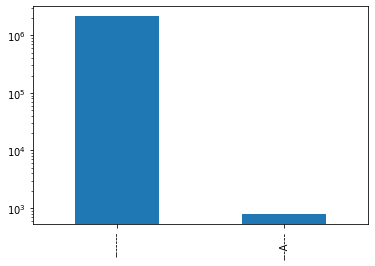

In [29]:
df2['FLAGS'].value_counts().plot.bar(logy=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6115ae0080>],
      dtype=object)

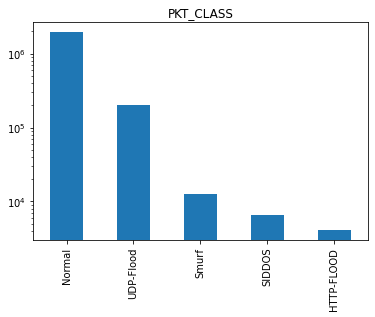

In [38]:
df2['PKT_CLASS'].value_counts().plot.bar(logy=True, subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f61160249e8>],
      dtype=object)

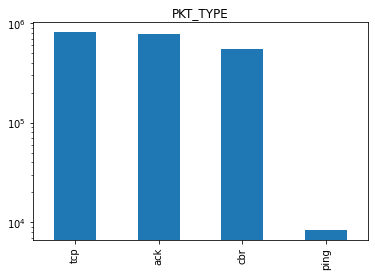

In [37]:
df2['PKT_TYPE'].value_counts().plot.bar(logy=True)

In [8]:
class_type=pd.pivot_table(df2[['PKT_CLASS', 'PKT_TYPE']], index=["PKT_TYPE"], columns="PKT_CLASS", aggfunc=np.count_nonzero).fillna(0).astype(int)
class_type

PKT_CLASS,HTTP-FLOOD,Normal,SIDDOS,Smurf,UDP-Flood
PKT_TYPE,,,,,
ack,0,1552230,242,6544,16044
cbr,0,738910,136,3104,370538
ping,0,8666,0,8048,86
tcp,8220,1572112,12952,7484,16020


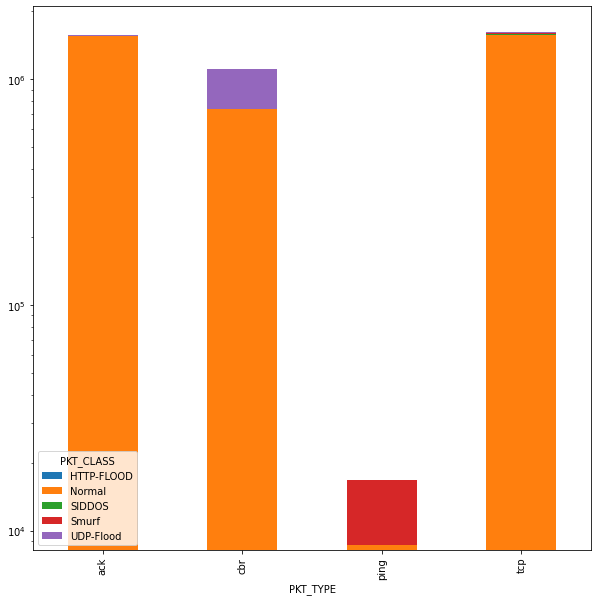

In [60]:
class_type.plot.bar(stacked=True, logy=True, figsize=(10,10))

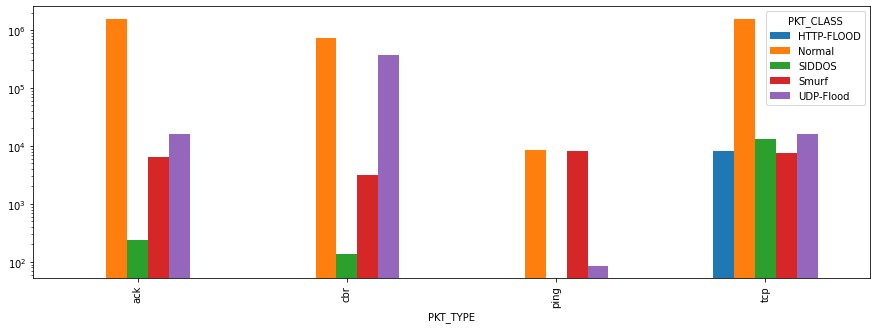

In [61]:
class_type.plot.bar(figsize=(15,5), logy=True)

Data is heavily imbalanced; having too many of one class vs another can introduce problems in classification models, as it can have a good accuracy by fitting only the main class. In the case of features, (todo: concept of missing informativeness)

TODO2: calculate relative values/percentages

### visualizing correlations between numeric variables

In [14]:
numerics = df2.columns.difference(categoricals)
df[numerics].corr()

,BYTE_RATE,DES_ADD,FID,FIRST_PKT_SENT,FROM_NODE,LAST_PKT_RESEVED,NUMBER_OF_BYTE,NUMBER_OF_PKT,PKT_AVG_SIZE,PKT_DELAY,PKT_DELAY_NODE,PKT_ID,PKT_IN,PKT_OUT,PKT_R,PKT_RATE,PKT_RESEVED_TIME,PKT_SEND_TIME,PKT_SIZE,SEQ_NUMBER,SRC_ADD,TO_NODE,UTILIZATION
BYTE_RATE,1.000000,0.566702,0.267002,-0.239494,-0.242434,-0.691650,0.573854,-0.147597,0.279858,0.427361,0.085858,-0.373031,0.015160,0.015203,0.015197,0.774032,0.015259,0.015154,0.279858,-0.021855,-0.529060,0.296960,0.573854
DES_ADD,0.566702,1.000000,0.444312,0.323903,-0.359468,0.030108,0.711187,-0.409145,0.216168,0.189596,0.086549,0.065267,0.218966,0.219007,0.219020,0.083429,0.219042,0.218962,0.216168,0.044151,-0.803349,0.537818,0.711188
FID,0.267002,0.444312,1.000000,0.691305,-0.053205,0.112677,-0.137698,-0.721028,-0.027028,0.114308,-0.046147,0.203442,0.408608,0.408583,0.408548,0.163832,0.408558,0.408633,-0.027029,-0.119914,-0.134805,0.244936,-0.137697
FIRST_PKT_SENT,-0.239494,0.323903,0.691305,1.000000,-0.115013,0.673572,-0.224895,-0.774651,-0.013301,-0.115409,-0.036810,0.521959,0.476490,0.476469,0.476451,-0.462520,0.476427,0.476514,-0.013301,-0.047604,-0.252366,0.173688,-0.224894
FROM_NODE,-0.242434,-0.359468,-0.053205,-0.115013,1.000000,-0.026729,-0.341198,0.101171,-0.091421,0.024259,0.092156,-0.042556,-0.062405,-0.062359,-0.062343,-0.023625,-0.062611,-0.062656,-0.091420,0.076680,0.469518,0.033945,-0.341198
LAST_PKT_RESEVED,-0.691650,0.030108,0.112677,0.673572,-0.026729,1.000000,-0.135848,-0.171578,-0.155467,-0.483949,-0.229831,0.590769,0.227922,0.227808,0.227790,-0.895746,0.227747,0.227910,-0.155467,-0.090252,-0.044717,0.010996,-0.135848
NUMBER_OF_BYTE,0.573854,0.711187,-0.137698,-0.224895,-0.341198,-0.135848,1.000000,0.240579,0.189737,-0.063474,-0.052774,-0.092916,-0.132091,-0.132116,-0.132130,0.112172,-0.132125,-0.132089,0.189737,-0.061847,-0.741494,0.372001,1.000000
NUMBER_OF_PKT,-0.147597,-0.409145,-0.721028,-0.774651,0.101171,-0.171578,0.240579,1.000000,-0.196836,-0.407207,-0.188924,-0.196773,-0.509856,-0.509946,-0.509981,0.040986,-0.510023,-0.509838,-0.196836,-0.134131,0.236403,-0.225003,0.240578
PKT_AVG_SIZE,0.279858,0.216168,-0.027028,-0.013301,-0.091421,-0.155467,0.189737,-0.196836,1.000000,0.254346,0.089722,-0.074490,0.023767,0.023811,0.023822,-0.045669,0.023912,0.023730,1.000000,-0.015906,-0.200646,0.114188,0.189737
PKT_DELAY,0.427361,0.189596,0.114308,-0.115409,0.024259,-0.483949,-0.063474,-0.407207,0.254346,1.000000,0.676385,-0.347004,0.153267,0.153599,0.153716,0.459933,0.153853,0.153182,0.254349,0.576178,0.015652,0.115077,-0.063474


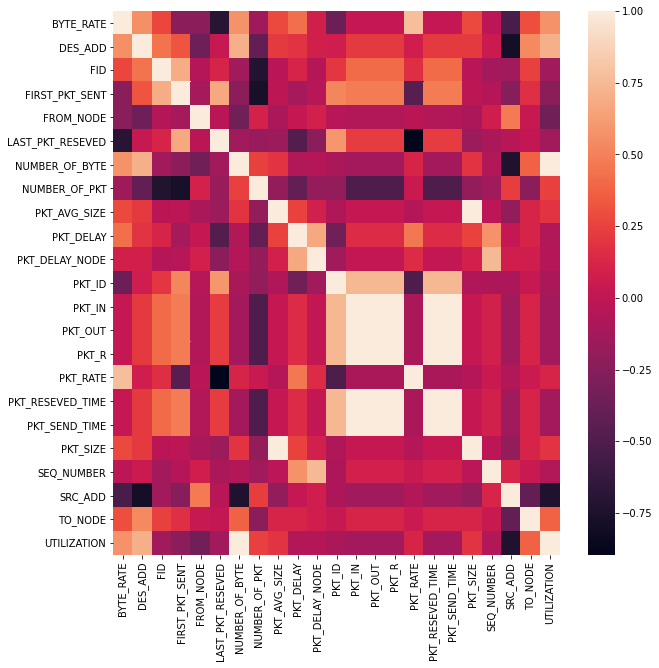

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, 
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values)

...
